<a href="https://colab.research.google.com/github/wesslen/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This assignment you are to partially use ChatGPT or LLM's but only for Problems 4 and 6 which are to aid you in interpretating the results. You are not to use ChatGPT or another LLM for Problems 1, 2, 3, 5 and 7. For those, you are to use the [reference material](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html) provided in class.**

# Dependencies

In [ ]:
%%capture
!pip install skforecast
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima
# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.datasets import fetch_dataset
# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Data

In [ ]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ENPLANE&scale=left&cosd=2000-01-01&coed=2024-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-27&revision_date=2024-06-27&nd=2000-01-01"

df = pd.read_csv(url, index_col=0, parse_dates=True)
df.head()

,ENPLANE
DATE,
2000-01-01,46492.0
2000-02-01,48526.0
2000-03-01,58764.0
2000-04-01,56032.0
2000-05-01,58201.0


In [ ]:
# filter df only by 2010 to 2020
df = df['2010-01-01':'2019-12-31']

Train dates : 2010-01-01 00:00:00 --- 2018-12-01 00:00:00  (n=108)
Test dates  : 2019-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=12)


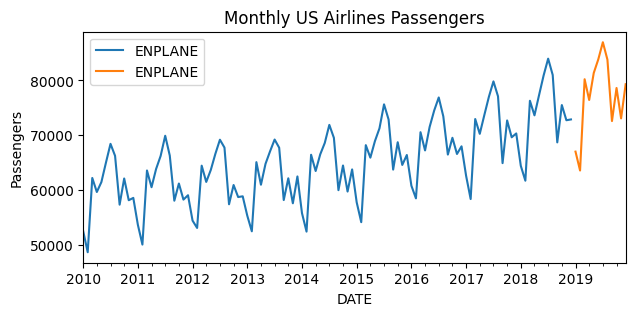

In [ ]:
end_train = '2018-12-31 23:59:59'
print(
    f"Train dates : {df.index.min()} --- {df.loc[:end_train].index.max()}  "
    f"(n={len(df.loc[:end_train])})"
)
print(
    f"Test dates  : {df.loc[end_train:].index.min()} --- {df.loc[:].index.max()}  "
    f"(n={len(df.loc[end_train:])})"
)
data_train = df.loc[:end_train]
data_test  = df.loc[end_train:]

# Plot
# ======================================================================================
fig, ax=plt.subplots(figsize=(7, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.set_title('Monthly US Airlines Passengers')
ax.set_ylabel('Passengers')
ax.legend();

Your goal is to develop a time series forecasting model for 2019 using 2010-2018 data as training.

# Problem 1: Visualizing Stationarity (No ChatGPT/LLM)

Use [this code](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html#Stationarity) to plot the train (2010-2018) data and the first/second order differences.

Use the code provided - **do not use ChatGPT** as it may provide alternative libraries code.

**Question**: What order (no difference, 1st order, or 2nd order) should you use to make the time series stationary?

Write 1-2 sentences justifying your answer.

Remember - you want to select the order that looks like it doesn't have any discernable patterns.

You do not need to run any statistical tests, but you can if you want further evidence.

In [ ]:
# add code here

## Problem 2: ARIMA(1,d,1) (No ChatGPT/LLM)

Set up a ARIMA(1,d,1), where d is the order you selected in Problem 1.

- Use [`skforecast`](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html#Skforecast) (i.e., `Sarimax`) for ARIMA -- again, don't use ChatGPT as it may use a different library.

- Do not add any seasonal differences at this time (that is, do not provide values to `seasonal_order`)

Fit and run a summary stats on this model.

In [ ]:
# add code here

## Problem 3: Interpretation (You may use ChatGPT/LLM)

Now interpret the results of your model from Problem 2.

For this, you **may** use ChatGPT or another LLM but you **must** provide your Share Link of your chat.

Assess your model's results - does it seem like your model fits the data well?

## Problem 4: ACF and PACF Plots (No ChatGPT/LLM)

Again, use [this code](https://cienciadedatos.net/documentos/py51-arima-sarimax-models-python.html#Autocorrelation-Analysis) and run ACF and PACF plots on the 0 (no difference), 1st, and 2nd order of your data. **Use the code in the plot** and don't use ChatGPT or else you may get different results.

Given your ACF and PACF plots for the order you choose in Problem 1: do you notice any seasonality patterns?

In [ ]:
# add in code for ACF

In [ ]:
# add in code for PACF

## Problem 5: Add in Seasonality Order (No ChatGPT/LLM)

Based on your answer for Problem 3, build a 2nd model and add in a `seasonal_order(1, 1, 1, s)` where `s` is the seasonal periodicity you decided from Problem 3.

In [ ]:
# add in code

## Problem 6: Use ChatGPT to compare and interpret both plots

- Create a prompt to compare the results of both Model 1 and Model 2.

- Provide the ChatGPT shared link.

- Based on the model statistics, which model fits the training data better?

- What factors should you also consider when making model selection?

## Problem 7: Forecasting (No ChatGPT/LLM)

Now use the code below to use your models to forecast for 2019.

The code below assumes your models have the following:
1. Model 1 is named `arima`
2. Model 2 (with seasonality) is named `arima2`

Modify these accordingly to predict your data.

In [ ]:
predictions_skforecast = arima.predict(steps=len(data_test))
predictions_skforecast.columns = ['skforecast']

fig, ax = plt.subplots(figsize=(7, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions_skforecast.plot(ax=ax, label='skforecast')
ax.set_title('Predictions with ARIMA models')
ax.legend();

In [ ]:
predictions_skforecast2 = arima2.predict(steps=len(data_test))
predictions_skforecast2.columns = ['skforecast']
fig, ax = plt.subplots(figsize=(7, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions_skforecast2.plot(ax=ax, label='skforecast')
ax.set_title('Predictions with ARIMA models')
ax.legend();

Answer these questions, each in 1-2 sentences:

- What is the difference between the two models forecast?

- Visually, which of the two models seem to fit your data out-of-sample (test/2019) data better?

- What are problems you still visualize with your selected model?